In [39]:
import numpy as np
import matplotlib.pyplot as plt
import operator
import functools
import prettytable


## 1.1

In [40]:
def prod_by_p(P, M):
    return M[P]


def pivot(A):
    n = A.shape[1]
    P = [[float(i == j) for i in range(n)] for j in range(n)]
    change_steps = 0
    for i in range(n):
        row = max(range(i, n), key=lambda j: abs(A[j, i]))
        if i != row:
            P[i], P[row] = P[row], P[i]
            change_steps += 1
        P = np.argwhere(np.array(P) == 1)[:, 1]
        return np.array(P), change_steps


def get_lu(A):
    n = A.shape[1]

    P, num_swaps = pivot(A)
    A = prod_by_p(P, A)

    L = np.eye(n)
    U = np.zeros((n, n))

    for j in range(n):
        for i in range(j+1):
            s1 = sum(U[k, j] * L[i, k] for k in range(i))
            U[i, j] = A[i, j] - s1
        for i in range(j, n):
            s2 = sum(U[k, j] * L[i, k] for k in range(j))
            L[i, j] = (A[i, j]-s2) / U[j, j]
    return (P, L, U), num_swaps


def get_lu_solution(L, U, b):
    n = b.shape[0]
    z = np.zeros(n)
    x = np.zeros(n)

    z[0] = b[0]
    for i in range(1, n):
        z[i] = b[i] - sum([L[i, j]*z[j] for j in range(i)])

    x[n-1] = z[n-1] / U[n-1, n-1]
    for i in reversed(range(n-1)):
        x[i] = (z[i] - sum([U[i, j]*x[j] for j in range(i+1, n)])) / U[i, i]

    return x


def det(U, s):
    return (-1)**s * np.prod([U[i, i] for i in range(U.shape[0])])


def inv_matrix(L, U, P):
    n = L.shape[0]
    P = prod_by_p(P, np.eye(n))
    A_inv = np.zeros((n, n))
    for idx, row in enumerate(P):
        A_inv[idx] = get_lu_solution(L, U, row)
    return A_inv.T


A = np.array([
    [-5, -1, -3, -1],
    [-2,  0,  8, -4],
    [-7, -2,  2, -2],
    [2,  -4, -4,  4]
])

b = np.array([18, -12, 6, -12]).astype(np.float32)

(p, l, u), swaps = get_lu(A)

print(f"P:\n{p}")
print(f"L:\n{l}")
print(f"U:\n{u}")

x = get_lu_solution(l, u, prod_by_p(p, b))
print(f"x:\n{x}")

print(f"B:\n{b}\nmy B:\n{np.dot(A, x)}")

det_u = det(u, swaps)
print(f"det(A): {det_u}")

a_inv = inv_matrix(l, u, p)
print(f"A^(-1):\n{a_inv}")
print(f"A * A^(-1):\n{np.dot(A, a_inv)}")


P:
[2 1 0 3]
L:
[[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571  0.75        1.          0.        ]
 [-0.28571429 -8.         -5.6         1.        ]]
U:
[[ -7.          -2.           2.          -2.        ]
 [  0.           0.57142857   7.42857143  -3.42857143]
 [  0.           0.         -10.           3.        ]
 [  0.           0.           0.          -7.2       ]]
x:
[-2.  3. -3. -2.]
B:
[ 18. -12.   6. -12.]
my B:
[ 18. -12.   6. -12.]
det(A): 288.0
A^(-1):
[[ 0.22222222  0.22222222 -0.33333333  0.11111111]
 [-0.33333333 -0.33333333  0.25       -0.29166667]
 [-0.33333333 -0.08333333  0.25       -0.04166667]
 [-0.77777778 -0.52777778  0.66666667 -0.13888889]]
A * A^(-1):
[[ 1.00000000e+00  3.33066907e-16 -7.77156117e-16  8.32667268e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.77635684e-15 -1.77635684e-15  4.8849

## 1.2

In [41]:
def tridiagonal_matrix(ac, bc, cc, fc):
    n = len(f)
    ac, bc, cc, fc = map(np.array, (a, b, c, f))

    for it in range(1, n):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1]
        fc[it] = fc[it] - mc*fc[it-1]

    xc = bc
    xc[-1] = fc[-1]/bc[-1]

    for il in range(n-2, -1, -1):
        xc[il] = (fc[il]-cc[il]*xc[il+1])/bc[il]

    return xc


c = [-9, -4, -8, 5]
b = [18, -9, 21, -10, 12]
a = [2, -9, -4, 7]
f = [-81, 71, -39, 64, 3]

answer = tridiagonal_matrix(a, b, c, f)
print("answer:", answer)

A = np.array([
    [18, -9,  0,   0,  0],
    [2,  -9, -4,   0,  0],
    [0,  -9, 21,  -8,  0],
    [0,   0, -4, -10,  5],
    [0,   0,  0,   7, 12]
])
print(f"f:\n{f}\nmy f:\n{np.dot(A, answer)}")


answer: [-8 -7 -6 -3  2]
f:
[-81, 71, -39, 64, 3]
my f:
[-81  71 -39  64   3]


## 1.3

In [42]:
def norm(M):
    n = len(M.shape)
    if n == 1:
        return np.sqrt(M.dot(M))
    elif n == 2:
        return np.linalg.norm(M)  # Frobenius norm


def cond_num(M):
    M_inv = np.linalg.inv(M)
    return norm(M) * norm(M_inv)


def iterations_method(a, b, eps, zeidel):
    n = len(b)
    alpha = np.zeros((n, n))
    beta = np.zeros(n)

    for i in range(n):
        beta[i] = b[i] / a[i, i]
        for j in range(n):
            if i != j:
                alpha[i, j] = - a[i, j] / a[i, i]

    cond_coef = norm(alpha)/(1 - norm(alpha))
    x_pr = np.zeros(n)
    x_cur = beta

    num_it = 0
    while (norm(x_cur - x_pr) * cond_coef >= eps):

        if not zeidel:
            x_pr = x_cur
            x_cur = beta + np.dot(alpha, x_cur)

        else:

            x_pr = x_cur
            tmp1 = np.zeros(n)

            tmp1[0] = beta[0] + sum(alpha[0] * x_cur)
            for k in range(1, n):
                tmp1[k] = beta[k] + \
                    sum(alpha[k, :k] * tmp1[:k]) + \
                    sum(alpha[k, k:] * x_cur[k:])

            x_cur = tmp1

        num_it += 1

    return x_cur, num_it


A = np.array([
    [21, -6, -9, -4],
    [-6, 20, -4, 2],
    [-2, -7, -20, 3],
    [4,  9, 6, 24]
])

b = np.array([127, -144, 236, -5]).astype(np.float32)
print("сondition number:", cond_num(A))
print("norm:", norm(A))

print("iterations")
x, iterations = iterations_method(A, b, 10e-3, zeidel=False)
print(f"iterations: {iterations}\nx: {x}")
print("Ax:", np.dot(A, x))

print("Zeidel")
x, iterations = iterations_method(A, b, 10e-3, zeidel=True)
print(f"iterations: {iterations}\nx: {x}")
print("Ax:", np.dot(A, x))


сondition number: 4.553464977796038
norm: 46.9148164229596
iterations
iterations: 13
x: [ 0.99969256 -9.00010663 -8.0001808   5.00006692]
Ax: [ 126.99554312 -143.99943092  236.00517809   -5.00166828]
Zeidel
iterations: 7
x: [ 1.00003705 -8.99997205 -8.00001895  4.99998808]
Ax: [ 127.00082862 -143.99961145  236.00007342   -5.        ]


## 1.4

In [43]:
def max_elem_idx(M):
    i_max, j_max, m = 0, 0, 0
    for i in range(len(M)):
        for j in range(i+1, len(M)):
            if np.abs(M[i, j]) > m:
                m = np.abs(M[i, j])
                i_max, j_max = i, j
    return i_max, j_max


def criteria(A):
    return np.sqrt(sum([A[i, j]**2 for i in range(len(A)) for j in range(len(A)) if i > j]))


def orth(A, i, j):
    if A[i, i] == A[j, j]:
        phi = np.pi / 4
    else:
        phi = .5 * np.arctan(2*A[i, j] / (A[i, i] - A[j, j]))

    U = np.eye(A.shape[0])
    U[i, j] = -np.sin(phi)
    U[j, i] = np.sin(phi)
    U[i, i] = np.cos(phi)
    U[j, j] = np.cos(phi)
    return U


def jacobi(A, eps=0.01):
    num_it = 1
    U_final = np.eye(A.shape[0])
    print("default criterion: ", criteria(A))
    while criteria(A) > eps:
        i, j = max_elem_idx(A)
        U = orth(A, i, j)
        U_final = np.dot(U_final, U)
        A = np.linalg.multi_dot([U.T, A, U])
        print(f"it: {num_it}, norm: {criteria(A)}")
        num_it += 1

    return A, U_final


A = np.array([
    [8, -3, 9],
    [-3, 8, -2],
    [9, -2, -8],
])

J, U = jacobi(A)
eigenvalues = [J[i, i] for i in range(len(J))]
eigenvectores = [U[:, i] for i in range(len(U))]

print("after iterations:", J, sep='\n')
print("eigenvalues:", eigenvalues, sep='\n')
print("Values:", eigenvectores, sep='\n')

print("orotogonality:")
for i in range(len(eigenvectores)):
    for j in range(i+1, len(eigenvectores)):
        print(f"(x{i}, x{j}) = ", np.dot(
            eigenvectores[i], eigenvectores[j]))

print("Ax = lambda*x")
for e, v in zip(eigenvalues, eigenvectores):
    print(f"{np.dot(A, v)} = {(e * v)}")


default criterion:  9.695359714832659
it: 1, norm: 3.6055512754639896
it: 2, norm: 0.5955119569103899
it: 3, norm: 0.29951665483432294
it: 4, norm: 0.008567321831287715
after iterations:
[[ 1.41143308e+01 -8.56676126e-03 -2.96902931e-18]
 [-8.56676126e-03  5.94541747e+00  9.80043440e-05]
 [ 6.78448118e-16  9.80043440e-05 -1.20597483e+01]]
eigenvalues:
[14.114330836196043, 5.945417474082699, -12.05974831027874]
Values:
[array([ 0.78387401, -0.50264086,  0.3645459 ]), array([0.47034713, 0.86395803, 0.17986134]), array([-0.40535802,  0.03047448,  0.91364992])]
orotogonality:
(x0, x1) =  1.3877787807814457e-17
(x0, x2) =  0.0
(x1, x2) =  0.0
Ax = lambda*x
[11.0598277  -7.10184067  5.14378058] = [11.06385705 -7.09443935  5.14532141]
[2.78965505 5.14090015 1.06631735] = [2.79641004 5.13659116 1.06935078]
[  4.88856174  -0.36742993 -11.01837051] = [  4.88851565  -0.3675146  -11.01838813]


## 1.5

In [44]:
def get_v(A, i):
    V = np.zeros(len(A))
    V[i] = A[i, i] + np.sign(A[i, i]) * \
        np.sqrt(sum([A[j, i]**2 for j in range(i, len(A))]))
    V[i+1:] = A[i+1:, i]
    return V.reshape(-1, 1)


def get_qr(A):
    n = len(A)
    Q = np.eye(n)
    for i in range(n-1):
        v = get_v(A, i)
        H = np.eye(n) - 2/(np.dot(v.T, v)) * np.dot(v, v.T)
        A = np.dot(H, A)
        Q = np.dot(Q, H)

    return Q, A


def criteria(A):
    n = len(A)
    return np.sqrt(sum([A[i, j]**2 for j in range(n) for i in range(j+1, n)]))


def comlex_ans(A):
    n = len(A)
    answers = np.zeros((n-1, 2), dtype=complex)
    for i in range(n-1):
        a11 = A[i][i]
        a12 = A[i][i + 1]
        a21 = A[i + 1][i]
        a22 = A[i + 1][i + 1]
        answers[i] = np.roots((1, -a11 - a22, a11 * a22 - a12 * a21))
    return answers


def complex_criteria(A, eps):
    Q, R = get_qr(A)
    A_next = np.dot(R, Q)

    complRoots = comlex_ans(A)
    complRootsNext = comlex_ans(A_next)

    for idx, (a, b) in enumerate(zip(complRoots, complRootsNext)):
        if np.sum(np.abs(a - b)**2) < eps:
            if 0 not in b:
                return set([idx, idx+1]), b
    return 0, 0


def iterate_qr(A,  eps=0.001):
    num_it = 1
    indSet = set(range(len(A)))
    while criteria(A) > eps:

        compIndices, ev = complex_criteria(A, eps)
        if compIndices != 0:
            i = indSet.difference(set(compIndices)).pop()
            print("Num iterations: ", num_it)
            return sorted(np.append(A[i, i], ev), reverse=True)

        Q, R = get_qr(A)
        A = np.dot(R, Q)
        num_it += 1
        if num_it == 10:
            break
    print("Num iterations: ", num_it)
    return [A[i, i] for i in range(len(A))]


A = np.array([
    [-9, -9, -3],
    [-9, 0, 2],
    [-5, -1, -4],
])

A = np.array([
    [1, 3, 1],
    [1, 1, 4],
    [4, 3, 1],
])


Q, R = get_qr(A)
print("cr:", criteria(A))
print("Q:", Q, sep='\n')
print("R:", R, sep='\n')
print("QR:", np.dot(Q, R), sep='\n')
print(f"Q-1:\n{np.linalg.inv(Q)}\nQ.T:\n{Q.T}")

e_values = iterate_qr(A)
print("eigen values:", e_values, sep='\n')
print("eigen values from numpy:", np.linalg.eig(A)[0], sep='\n')


cr: 5.0990195135927845
Q:
[[-0.23570226  0.96582428  0.10783277]
 [-0.23570226  0.05083286 -0.97049496]
 [-0.94280904 -0.25416428  0.21566555]]
R:
[[-4.24264069e+00 -3.77123617e+00 -2.12132034e+00]
 [ 1.48094774e-17  2.18581284e+00  9.14991422e-01]
 [ 1.10030137e-16  1.49547129e-16 -3.55848152e+00]]
QR:
[[1. 3. 1.]
 [1. 1. 4.]
 [4. 3. 1.]]
Q-1:
[[-0.23570226 -0.23570226 -0.94280904]
 [ 0.96582428  0.05083286 -0.25416428]
 [ 0.10783277 -0.97049496  0.21566555]]
Q.T:
[[-0.23570226 -0.23570226 -0.94280904]
 [ 0.96582428  0.05083286 -0.25416428]
 [ 0.10783277 -0.97049496  0.21566555]]
Num iterations:  5
eigen values:
[(6.313174860729379+0j), (-1.6761220268750678+1.5529441689226442j), (-1.6761220268750678-1.5529441689226442j)]
eigen values from numpy:
[ 6.34280359+0.j         -1.6714018 +1.55214776j -1.6714018 -1.55214776j]


## 2.1

In [45]:
def f(x):
    return x*np.exp(x) + x**2 - 1


def df(x):
    return np.exp(x)*(1 + x) + 2*x


def phi(x, lmbd=0.1):
    return x - lmbd*f(x)


def dphi(x, lmbd=0.1):
    return 1 - lmbd*df(x)


def getQ(l, r):
    return max(abs(dphi(l)), abs(dphi(r)))


def simple_iterations(a, b, eps=10e-4):
    x_pr, x = a, (a + b)/2
    q = getQ(a, b)
    coef = q/(1 - q)

    num_it = 1
    print("q:", q)
    while coef*abs(x - x_pr) > eps:
        print(f"it: {num_it}, dx: {coef*abs(x - x_pr)}")
        x_pr, x = x, phi(x)
        num_it += 1
    print(f"final it: {num_it}, dx: {coef*abs(x - x_pr)}")
    return x


def newton_method(a, b, x0=0.6, eps=10e-4):
    x_pr, x = 0, x0

    num_it = 1
    while abs(x - x_pr) > eps:
        print(f"it: {num_it}, dx: {abs(x - x_pr)}")
        x_pr, x = x, x - f(x)/df(x)
        num_it += 1
    print(f"final it: {num_it}, dx: {abs(x - x_pr)}")
    return x


print("simple iterations")
root = simple_iterations(0, 1)
print(f"root = {root}")
print(f"checking: f(root) = {f(root)}")

print("Newton method")
root = newton_method(0, 1)
print(f"root = {root}")
print(f"checking: f(root) = {f(root)}")


simple iterations
q: 0.9
it: 1, dx: 4.500000000000001
it: 2, dx: 0.0669245718150578
it: 3, dx: 0.04383309222432547
it: 4, dx: 0.028873130772942686
it: 5, dx: 0.019089521905553634
it: 6, dx: 0.012651770063255909
it: 7, dx: 0.008398522530342458
it: 8, dx: 0.005581030447877612
it: 9, dx: 0.003711340165028277
it: 10, dx: 0.002469161742569726
it: 11, dx: 0.0016432469489274795
it: 12, dx: 0.0010938193158787082
final it: 13, dx: 0.00072819528311735
root = 0.47833362186501366
checking: f(root) = 0.0005387003240253652
Newton method
it: 1, dx: 0.6
it: 2, dx: 0.11014053864985934
it: 3, dx: 0.011566112889711821
final it: 4, dx: 0.0001209380902851831
root = 0.47817241037014363
checking: f(root) = 4.38638101396549e-08


## 2.2

In [46]:
def f1(x):
    return 2*x[0] - np.cos(x[1])


def f2(x):
    return 2*x[1] - np.exp(x[0])


def phi1(x):
    return np.cos(x[1]) / 2


def phi2(x):
    return np.exp(x[0]) / 2


def df(x, func="", arg=""):
    if func == "f1":
        if arg == "x1":
            return 2
        else:
            return np.sin(x[1])
    elif func == "f2":
        if arg == "x1":
            return -np.exp(x[0])
        else:
            return 2

    elif func == "phi1":
        if arg == "x1":
            return 0
        else:
            return -np.sin(x[1])/2
    elif func == "phi2":
        if arg == "x1":
            return np.exp(x[0]) / 2
        else:
            return 0


def J(x):
    return np.array([[df(x, "f1", "x1"), df(x, "f1", "x2")],
                     [df(x, "f2", "x1"), df(x, "f2", "x2")]])


def A1(x):
    return np.array([[f1(x), df(x, "f1", "x2")],
                     [f2(x), df(x, "f2", "x2")]])


def A2(x):
    return np.array([[df(x, "f1", "x1"), f1(x)],
                     [df(x, "f2", "x1"), f2(x)]])


def get_Q(x):
    m = np.array([[df(x, func="phi1", arg="x1"), df(x, func="phi1", arg="x2")],
                  [df(x, func="phi2", arg="x1"), df(x, func="phi2", arg="x2")], ])
    return max(np.sum(abs(m), axis=1))


def get_root(intervals, eps=0.001, iters=False):
    x_old, x = np.zeros(2), np.mean(intervals, axis=1)
    num_it = 0

    if iters:
        coef = get_Q(x) / (1 - get_Q(x))
    else:
        coef = 1

    while np.max(abs(x - x_old)) * coef > eps:
        num_it += 1
        if iters:
            x_old, x = x, np.array([phi1(x), phi2(x)])
        else:
            x_old, x = x, np.array([x[0] - np.linalg.det(A1(x)) / np.linalg.det(J(x)),
                                    x[1] - np.linalg.det(A2(x)) / np.linalg.det(J(x))])
    print("iterations:", num_it)
    return x


intervals = np.array([[0, .5],
                      [.5, 1]])

print("Newton method")
x = get_root(intervals, iters=False)
print("Newton answer:", x)
print(f"f1(x) = {f1(x)}, f2(x) = {f2(x)}")

print("simple iterations")
x = get_root(intervals, iters=True)
print("simple iterations answer:", x)
print(f"f1(x) = {f1(x)}, f2(x) = {f2(x)}")

Newton method
iterations: 3
Newton answer: [0.37372831 0.72657115]
f1(x) = 5.555556015224283e-13, f2(x) = -5.792255564074367e-12
simple iterations
iterations: 9
simple iterations answer: [0.37370172 0.72629289]
f1(x) = -0.00023799730317619616, f2(x) = -0.0005178677490138561


## 3.1

In [47]:
def f(x):
    return np.log(x) + x


def get_w(points, x, i):
    return functools.reduce(operator.mul, [x - points[j] for j in range(len(points)) if i != j])


def get_coefs(x, y):
    n = len(x)
    coefs = [y[i] for i in range(n)]

    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coefs[i] = float(coefs[i] - coefs[i - 1]) / float(x[i] - x[i - j])

    return coefs


def lagrange_interpolation(points, x):
    res = 0
    for i in range(len(points)):
        f_w = f(points[i]) / get_w(points, points[i], i)
        res += f_w * get_w(points, x, i)

    return res


def newton_interpolation(points, x):
    y = [f(i) for i in points]
    coefs = get_coefs(points, y)
    n = len(coefs) - 1
    res = coefs[n]
    for i in range(n - 1, -1, -1):
        res = res * (x - points[i]) + coefs[i]
    return res


points = np.array([[0.1, 0.5, 0.9, 1.3],
                   [0.1, 0.5, 1.1, 1.3]])
x = 0.8

for i in range(len(points)):
    print("points: {}, x = {}".format(points[i], x))
    val = f(x)

    print("Lagrange")
    val_by_lagrange = lagrange_interpolation(points[i], x)
    print("real:", val)
    print("Lagrange:", val_by_lagrange)
    print("error:", abs(val - val_by_lagrange))

    print("Newton")
    val_by_newton = newton_interpolation(points[i], x)
    print("real:", val)
    print("Newton:", val_by_newton)
    print("error:", abs(val - val_by_newton))


points: [0.1 0.5 0.9 1.3], x = 0.8
Lagrange
real: 0.5768564486857903
Lagrange: 0.5996357042970935
error: 0.022779255611303117
Newton
real: 0.5768564486857903
Newton: 0.5996357042970932
error: 0.022779255611302895
points: [0.1 0.5 1.1 1.3], x = 0.8
Lagrange
real: 0.5768564486857903
Lagrange: 0.6341106211498607
error: 0.057254172464070385
Newton
real: 0.5768564486857903
Newton: 0.6341106211498606
error: 0.057254172464070274


## 3.2

splines coefs(abcd):
1. [-2.2026, 5.6729, 0.0, -4.0581]
2. [-0.1931, 3.725, -4.8698, 4.3272]
3. [0.7946, 1.9063, 0.3229, -0.7253]
4. [1.5624, 1.8165, -0.5474, 0.4562]

f(0.8) = 0.6029



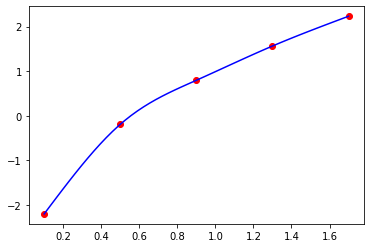

In [48]:
import numpy as np
import matplotlib.pyplot as plt


def tdma(matrix, d, length):
    a, b, c = zip(*matrix)
    p, q = np.zeros(length), np.zeros(length)
    p[0] = -c[0] / b[0]
    q[0] = d[0] / b[0]
    x = np.zeros(length+1)
    for i in range(1, length):
        p[i] = (-c[i] / (b[i] + a[i] * p[i - 1]))
        q[i] = ((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    for i in reversed(range(length)):
        x[i] = p[i] * x[i + 1] + q[i]
    return np.insert(x[:-1], 0, 0)


def get_spline(x, y):
    length = len(x)
    h = [x[i] - x[i - 1] for i in range(1, length)]
    b, m = np.zeros(length-2), np.zeros((length-2, length-2))
    m[0] = np.array([0, 2 * (h[0] + h[1]), h[1]])
    b[0] = np.array([3 * ((y[2] - y[1]) / h[1] - (y[1] - y[0]) / h[0])])

    for i in range(1, length - 3):
        m[i] = [h[i], 2 * (h[i] + h[i + 1]), h[i + 1]]
        b[i] = 3 * ((y[i + 2] - y[i + 1]) /
                    h[i + 1] - (y[i + 1] - y[i]) / h[i])
    m[-1] = [h[-2], 2 * (h[-2] + h[-1]), 0]
    b[-1] = 3 * ((y[-1] - y[-2]) / h[-1] - (y[-2] - y[-3]) / h[-2])

    c = tdma(m, b, length - 2)
    a, b, d = np.zeros(length-1), np.zeros(length-1), np.zeros(length-1)
    for i in range(1, length-1):
        a[i-1] = y[i - 1]
        d[i-1] = (c[i] - c[i - 1]) / (3 * h[i - 1])
        b[i-1] = (y[i] - y[i - 1]) / h[i - 1] - \
            h[i - 1] * (c[i] + 2 * c[i - 1]) / 3
    a[-1] = y[i]
    b[-1] = (y[-1] - y[-2]) / h[-1] - 2 * h[-1] * c[-1] / 3
    d[-1] = -c[-1] / (3 * h[-1])
    return a, b, c, d


def get_pol_value(x0, x, k, coef):
    a, b, c, d = coef
    h = (x0 - x[k])
    return a[k] + b[k] * h + c[k] * h**2 + d[k] * h**3


def get_pol(x, x_test, coef):
    for k in range(len(x)-1):
        if x[k] <= x_test <= x[k+1]:
            break
    return get_pol_value(x_test, x, k, coef)


def plot(x, y, coef):
    x_plot = np.linspace(x[0], x[-1], 50)
    y_plot = [get_pol(x, i, coef) for i in x_plot]

    plt.plot(x_plot, y_plot, color='b')
    plt.scatter(x, y, color='r')
    plt.show()


x = [0.1, 0.5, 0.9, 1.3, 1.7]
y = [-2.2026, -0.19315, 0.79464, 1.5624, 2.2306]
x_test = 0.8

coef = get_spline(x, y)
res = get_pol(x, x_test, coef)

print("splines coefs(abcd):")
for idx, i in enumerate(range(len(coef[0]))):
    print(f"{idx+1}. {[round(x[i], 4) for x in coef]}")
print(f"\nf({x_test}) = {round(res, 4)}\n")

plot(x, y, coef)


## 3.3

pol. of power 1: [ 2.37582214 -1.77443936]
error: 0.9854121221771428
pol. of power 2: [-0.92289174  4.40618397 -2.46045555]
error: 0.171386167509286


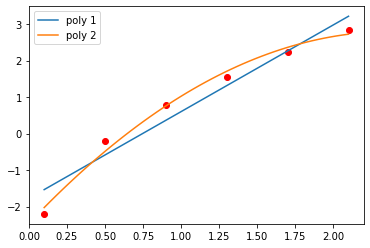

In [49]:
def mls(k, x, y):
    A = np.array([[i**j for i in x] for j in reversed(range(k+1))]).T
    return np.linalg.multi_dot([np.linalg.inv(np.dot(A.T, A)), A.T, y])


def calculate_error(x, y, coefs):
    return sum((y - np.polyval(coefs, x))**2)


def plot_polys(x, y, coefs):
    x_plot = np.linspace(x[0], x[-1], 50)
    for i, c in enumerate(coefs):
        y_plot = [np.polyval(c, x) for x in x_plot]
        plt.plot(x_plot, y_plot, label=f"poly {i+1}")
    plt.scatter(x, y, color='r')
    plt.legend()
    plt.show()


x = np.array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1])
y = np.array([-2.2026, -0.19315, 0.79464, 1.5624, 2.2306, 2.8419])

coefs1 = mls(1, x, y)
err1 = calculate_error(x, y, coefs1)
print("pol. of power 1:", coefs1)
print("error:", err1)

coefs2 = mls(2, x, y)
err2 = calculate_error(x, y, coefs2)
print("pol. of power 2:", coefs2)
print("error:", err2)

plot_polys(x, y, [coefs1, coefs2])


## 3.4

In [50]:
def d1(x, y, k):
    l = (y[k] - y[k-1]) / (x[k] - x[k-1])
    r = (y[k+1] - y[k]) / (x[k+1] - x[k])
    return (l+r)/2, (l, r)


def d2(x, y, k):
    _, lr = d1(x, y, k)
    return 2*(lr[1] - lr[0])/(x[k+1] - x[k-1])


x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 2, 3.4142, 4.7321, 6])
x_test = 2

k = np.argwhere(x == x_test)[0, 0]

print(f"f'({x_test}) = {d1(x, y, k)[0]}")
print(f"f''({x_test}) = {d2(x, y, k)}")


f'(2) = 1.36605
f''(2) = -0.09630000000000027


## 3.5

In [51]:
def f(x):
    return x**2/(x**4 + 256)


def simpson(a, b, h, n):
    s = f(a) + f(b)
    for i in range(1, n, 2):
        s += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h)
    return s * h / 3


def runge_romberg(h, res, method):
    value = 0.0101482613507258535
    k = h[1] / h[0]
    if method == "rectangle" or "trapezium":
        p = 2
    elif method == "simpson":
        p = 4
    return abs((res[1] - res[0]) / (k**p - 1)), abs((res[0] - value) / (k**p - 1))


x0, xk = 0, 2
h1, h2 = 0.5, 0.25

x1 = np.linspace(x0, xk, int((xk - x0) / h1) + 1)
x2 = np.linspace(x0, xk, int((xk - x0) / h2) + 1)

rect1 = h1*sum([f((x1[i] + x1[i+1]) / 2)
                for i in range(len(x1)-1)])
rect2 = h2*sum([f((x2[i] + x2[i+1]) / 2)
                for i in range(len(x2)-1)])
print(f"rectangles\th1:{rect1:.5f}\th2:{rect2:.5f}")
err = runge_romberg([h1, h2], [rect1, rect2], "rectangle")
print(f"error: {err[0]:.5f}\tRunge-Romberg err: {err[1]:.5f}")

tr1 = h1*sum([f(x1[i]) + f(x1[i+1]) for i in range(len(x1)-1)]) / 2
tr2 = h2*sum([f(x2[i]) + f(x2[i+1]) for i in range(len(x2)-1)]) / 2
print(f"trapezium\th1:{tr1:.5f}\th2:{tr2:.5f}")
err = runge_romberg([h1, h2], [tr1, tr2], "trapezium")
print(f"error: {err[0]:.5f}\tRunge-Romberg err: {err[1]:.5f}")

s1 = simpson(x0, xk, h1, len(x1))
s2 = simpson(x0, xk, h2, len(x2))
print(f"Simpson\th1:{s1:.5f}\th2:{s2:.5f}")
err = runge_romberg([h1, h2], [s1, s2], "simpson")
print(f"error: {err[0]:.7f}\tRunge-Romberg err: {err[1]:.7f}")


rectangles	h1:0.01001	h2:0.01011
error: 0.00014	Runge-Romberg err: 0.00018
trapezium	h1:0.01042	h2:0.01022
error: 0.00027	Runge-Romberg err: 0.00036
Simpson	h1:0.01014	h2:0.01015
error: 0.0000045	Runge-Romberg err: 0.0000048


## 4.1

In [57]:
def f(x, y, y1):
    return (2*x*y1 - 2*y)/(x**2 - 1)


def orig_f(x):
    return x**2 + x + 1


def euler(f, xa, xb, ya, y1a, h):
    n = int((xb - xa) / h)
    x = xa
    y = ya
    x_res, y_res = np.zeros(n+1), np.zeros(n+1)
    x_res[0], y_res[0] = x, y
    y1 = y1a
    for i in range(1, n+1):
        y1 += h * f(x, y, y1)
        y += h * y1
        x += h
        x_res[i] = x
        y_res[i] = y
    return x_res, y_res


def runge_kutta(f, xa, xb, ya, y1a, h):
    n = int((xb - xa) / h)
    x, y, z = xa, ya, y1a
    x_res, y_res, z_res = np.zeros(n+1), np.zeros(n+1), np.zeros(n+1)
    x_res[0], y_res[0], z_res[0] = x, y, z
    k, l = np.zeros(4), np.zeros(4)
    for i in range(n):
        k[0] = h * z
        l[0] = h * f(x, y, z)
        k[1] = h * (z + 0.5 * l[0])
        l[1] = h * f(x + 0.5 * h, y + 0.5 * k[0], z + 0.5 * l[0])
        k[2] = h * (z + 0.5 * l[1])
        l[2] = h * f(x + 0.5 * h, y + 0.5 * k[1],  z + 0.5 * l[1])
        k[3] = h * (z + l[2])
        l[3] = h * f(x + h, y + k[2], z + l[2])
        x = xa + (i+1) * h
        y += (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6
        z += (l[0] + 2 * l[1] + 2 * l[2] + l[3]) / 6
        x_res[i+1] = x
        y_res[i+1] = y
        z_res[i+1] = z
    return (list(x_res), list(y_res)), z_res


def adams(f, x, y, h, n, z):
    z = np.concatenate((z[:4], np.zeros(len(z) - 4)))
    for i in range(3, n):
        z[i + 1] = z[i] + h/24 * (55*f(x[i], y[i], z[i]) -
                                  59*f(x[i - 1], y[i - 1], z[i - 1]) +
                                  37*f(x[i - 2], y[i - 2], z[i - 2]) -
                                  9*f(x[i - 3], y[i - 3], z[i - 3]))
        tmp = y[i] + h/24 * (55*z[i] - 59*z[i - 1] +
                             37*z[i - 2] - 9*z[i - 3])
        x.append(x[-1] + h)
        y.append(tmp)
    return x, y


def get_table(name, res, runge_y, p):
    print(f"{name}")
    table = prettytable.PrettyTable(['x', 'y', 'y_true', 'abs error',
                         'Runge eps'])
    for x, y, yr in zip(*res, runge_y):
        tmp = orig_f(x)
        table.add_row([round(x, 2), round(y, 3), round(tmp, 3), abs(y - tmp),
                       abs(y - yr) / (2**p - 1)])
    print(table)


a = 2
b = 3
y0 = 7
y10 = 5
h = 0.2

res_euler = euler(f, a, b, y0, y10, h)
res_euler_h = euler(f, a, b, y0, y10, h / 2)
get_table('Euler', res_euler, res_euler_h[1], 1)

res_rk, z = runge_kutta(f, a, b, y0, y10, h)
res_rk_h, z_h = runge_kutta(f, a, b, y0, y10, h / 2)
get_table('Runge-Kutta', res_rk, res_rk_h[1], 4)

res_adams = adams(f, res_rk[0][:4], res_rk[1][:4], h, int((b - a) / h), z)
res_adams_h = adams(f, res_rk[0][:4], res_rk[1][:4], h / 2,
                    int((b - a) / h), z_h)
get_table('Adams', res_adams, res_adams_h[1], 4)


Euler
+-----+--------+--------+---------------------+--------------------+
|  x  |   y    | y_true |      abs error      |     Runge eps      |
+-----+--------+--------+---------------------+--------------------+
| 2.0 |  7.0   |  7.0   |         0.0         |        0.0         |
| 2.2 |  8.08  |  8.04  | 0.03999999999999915 | 0.5600000000000005 |
| 2.4 | 9.239  |  9.16  | 0.07916666666666572 | 1.1792253176930618 |
| 2.6 | 10.477 | 10.36  |  0.1168347338935547 | 1.8570626175690226 |
| 2.8 | 11.792 | 11.64  | 0.15245905306566776 | 2.5930131132934857 |
| 3.0 | 13.186 |  13.0  |  0.1855837396687008 | 3.386662607444789  |
+-----+--------+--------+---------------------+--------------------+
Runge-Kutta
+-----+-------+--------+------------------------+----------------------+
|  x  |   y   | y_true |       abs error        |      Runge eps       |
+-----+-------+--------+------------------------+----------------------+
| 2.0 |  7.0  |  7.0   |          0.0           |         0.0          |


## 4.2

In [58]:
def exact_func(x):
    return x + 1 + 1/x


def func(x, y, y1):
    return (2*y - 2*(x+1)*y1)/(x*(2*x+1))


def p(x):
    return 2*(x+1)/(x*(2*x+1))


def q(x):
    return -2/(x*(2*x+1))


def f(x):
    return 0


def tma(a, b, c, d, length):
    p = [-c[0] / b[0]]
    q = [d[0] / b[0]]
    x = [0] * (length + 1)
    for i in range(1, length):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    for i in reversed(range(length)):
        x[i] = p[i] * x[i+1] + q[i]
    return x[:-1]


def runge_kutta(f, xa, xb, ya, y1a, h):
    n = int((xb - xa) / h)
    x, y, z = xa, ya, y1a
    x_res, y_res, z_res = np.zeros(n+1), np.zeros(n+1), np.zeros(n+1)
    x_res[0], y_res[0], z_res[0] = x, y, z
    k, l = np.zeros(4), np.zeros(4)
    for i in range(n):
        k[0] = h * z
        l[0] = h * f(x, y, z)
        k[1] = h * (z + 0.5 * l[0])
        l[1] = h * f(x + 0.5 * h, y + 0.5 * k[0], z + 0.5 * l[0])
        k[2] = h * (z + 0.5 * l[1])
        l[2] = h * f(x + 0.5 * h, y + 0.5 * k[1],  z + 0.5 * l[1])
        k[3] = h * (z + l[2])
        l[3] = h * f(x + h, y + k[2], z + l[2])
        x = xa + (i+1) * h
        y += (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6
        z += (l[0] + 2 * l[1] + 2 * l[2] + l[3]) / 6
        x_res[i+1] = x
        y_res[i+1] = y
        z_res[i+1] = z
    return (list(x_res), list(y_res)), z_res


def get_d1(x1, y1, x):
    for i in range(len(x1)):
        if x - x1[i + 1] < 1e-7:
            break
    return (y1[i + 1] - y1[i]) / (x1[i+1] - x1[i])


def next_n(cur_n, prev_n, cur, prev, alpha1, beta1, B, b):
    num = np.zeros(5)
    num[0] = beta1 * get_d1(cur[0], cur[1], b)
    num[1] = beta1 * get_d1(prev[0], prev[1], b)
    num[2] = alpha1 * prev[1][len(prev[0]) - 1]
    num[3] = alpha1 * cur[1][len(cur[0]) - 1] + num[0] - B
    num[4] = alpha1 * cur[1][len(cur[0]) - 1] + num[0] - num[2] - num[1]
    return cur_n - num[3] * (cur_n - prev_n) / num[4]


def shooting_method(reg, h, eps, f, alpha, beta, A, B):
    n_prev = 1
    n_cur = 0.8
    prev = runge_kutta(
        f, reg[0], reg[1], n_prev, (A - alpha[0] * n_prev) / beta[0], h)[0]
    cur = runge_kutta(f, reg[0], reg[1], n_cur,
                      (A - alpha[0] * n_cur) / beta[0], h)[0]
    while abs(alpha[1] * cur[1][len(cur[0]) - 1] +
              beta[1] * get_d1(cur[0], cur[1], reg[1]) - B) > eps:
        n = next_n(n_cur, n_prev, cur, prev, alpha[1], beta[1], B, reg[1])
        n_prev, n_cur, prev = n_cur, n, cur
        cur = runge_kutta(f, reg[0], reg[1], n_cur,
                          (A - alpha[0]*n_cur) / beta[0], h)[0]
    return cur


def finite_difference(reg, h, alpha, beta, A, B):  # x
    n = round((reg[1] - reg[0]) / h)
    x, a, b, c, d = np.zeros(n+1), np.zeros(n+1), \
        np.zeros(n+1), np.zeros(n+1), np.zeros(n+1)
    x[0] = reg[0]
    x[1] = (x[0] + h)

    b[0] = (-2 / (h * (2 - p(reg[0]) * h)) + q(reg[0]) * h /
            (2 - p(reg[0]) * h) + alpha[0] / beta[0])
    c[0] = 2 / (h * (2 - p(reg[0]) * h))
    d[0] = A / beta[0] + h * f(reg[0]) / (2 - p(reg[0]) * h)

    for i in range(1, n):
        x[i+1] = x[i] + h
        a[i] = 1 / h**2 - p(x[i]) / (2 * h)
        b[i] = -2 / h**2 + q(x[i])
        c[i] = 1 / h**2 + p(x[i]) / (2 * h)
        d[i] = f(x[i])

    a[-1] = -2 / (h * (2 + p(x[n]) * h))
    b[-1] = (2 / (h * (2 + p(x[n]) * h)) - q(x[n]) * h /
             (2 + p(x[n]) * h) + alpha[1] / beta[1])
    d[-1] = B / beta[1] - h * f(x[n]) / (2 + p(x[n]) * h)

    y = tma(a, b, c, d, len(a))
    return x, y


reg = [1, 3]
alpha = [0, 1]
beta = [1, -1]
y0 = 0
y10 = 31/9
step = 0.2
eps = 1e-3

sm1 = shooting_method(reg, step, eps, func, alpha,
                      beta, y0, y10)
sm2 = shooting_method(reg, step / 2, eps, func, alpha,
                      beta, y0, y10)
get_table('Shooting method', sm1, sm2[1], 2)

fd1 = finite_difference(reg, step, alpha,
                        beta, y0, y10)
fd2 = finite_difference(reg, step / 2, alpha,
                        beta, y0, y10)
get_table('Finite difference method', fd1, fd2[1], 1)



Shooting method
+-----+-------+---------+----------------------+-----------------------+
|  X  |   Y   | Y_truth |      Abs error       |       Runge eps       |
+-----+-------+---------+----------------------+-----------------------+
| 1.0 | 2.993 |   3.0   | 0.006958631126713577 | 0.0012071979738029388 |
| 1.2 | 3.026 |   3.64  |  0.6136566655860771  |  0.006865945914784326 |
| 1.4 | 3.107 |   4.36  |  1.2528769641746997  |  0.025720372728492407 |
| 1.6 | 3.218 |   5.16  |  1.9424134189418742  |  0.050588865588562015 |
| 1.8 | 3.348 |   6.04  |  2.6921575573814986  |  0.07900576212751102  |
| 2.0 | 3.492 |   7.0   |  3.5080459830275488  |  0.10960198411664675  |
| 2.2 | 3.646 |   8.04  |  4.393857090667423   |  0.14157541544140942  |
| 2.4 | 3.808 |   9.16  |   5.35211001807844   |  0.17443608433857882  |
| 2.6 | 3.975 |  10.36  |  6.3845488695810495  |  0.20787464528201557  |
| 2.8 | 4.148 |  11.64  |   7.49241947241613   |  0.24169057830438026  |
| 3.0 | 4.323 |   13.0  |  8.67663